# Granger Causality Analysis

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

df_dynamic_subset = pd.read_csv(r'granger_data.csv')

# Initialize a dictionary to store networks for each time point
networks = {}

# Get unique time points in sorted order
time_points = sorted(df_dynamic_subset['YearMonth'].unique())

# Loop through each time point and build a network
for time_point in time_points:
    # Subset data for the current time point
    df_time = df_dynamic_subset[df_dynamic_subset['YearMonth'] == time_point]
    
    # Pivot to wide format (rows: participants, columns: questions)
    df_wide = df_time.pivot(index='Participant_Number', columns='Question', values='Score')
    
    # Compute correlation matrix
    corr_matrix = df_wide.corr()
    
    # Create a network using NetworkX (add edges for significant correlations)
    G = nx.Graph()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.4:  # Correlation threshold
                G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_matrix.iloc[i, j])
    
    # Store the network for the current time point
    networks[time_point] = G


# Granger Causality

## Means

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



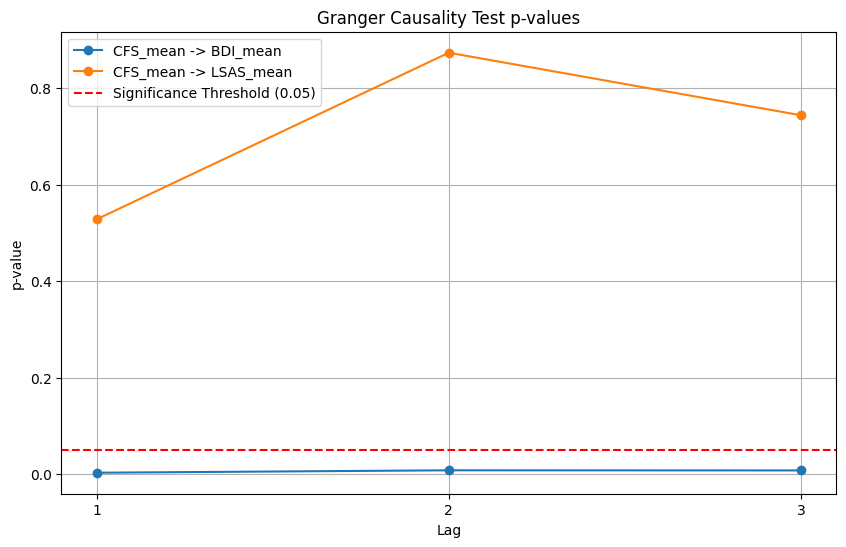

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Step 1: Clean the data to ensure no formatting issues
df_dynamic_subset['Question'] = df_dynamic_subset['Question'].str.strip()

# Step 2: Aggregate duplicate entries by taking the mean score for each combination
df_aggregated = df_dynamic_subset.groupby(['YearMonth', 'Participant_Number', 'Question']).mean().reset_index()

# Step 3: Pivot the dataset to wide format
df_pivot = df_aggregated.pivot_table(index='YearMonth', columns='Question', values='Score', aggfunc='mean').sort_index()

# Step 4: Select columns related to CFS, BDI, and LSAS
cfs_columns = [col for col in df_pivot.columns if 'CFS' in col]
bdi_columns = [col for col in df_pivot.columns if 'BDI' in col]
lsas_columns = [col for col in df_pivot.columns if 'LSAS' in col]

# Step 5: Compute the mean score across items for each group at each time point
df_mean_scores = pd.DataFrame({
    'CFS_mean': df_pivot[cfs_columns].mean(axis=1),
    'BDI_mean': df_pivot[bdi_columns].mean(axis=1),
    'LSAS_mean': df_pivot[lsas_columns].mean(axis=1)
}).dropna()  # Drop rows with NaN values

# Step 6: Run Granger causality tests
# Test if CFS_mean Granger-causes BDI_mean
granger_result_bdi = grangercausalitytests(df_mean_scores[['CFS_mean', 'BDI_mean']], maxlag=3, verbose=False)

# Test if CFS_mean Granger-causes LSAS_mean
granger_result_lsas = grangercausalitytests(df_mean_scores[['CFS_mean', 'LSAS_mean']], maxlag=3, verbose=False)

# Step 7: Extract p-values for Granger causality tests
p_values_bdi = [granger_result_bdi[lag][0]['ssr_ftest'][1] for lag in granger_result_bdi]
p_values_lsas = [granger_result_lsas[lag][0]['ssr_ftest'][1] for lag in granger_result_lsas]

# Step 8: Visualize p-values over different lags
lags = range(1, 4)
plt.figure(figsize=(10, 6))
plt.plot(lags, p_values_bdi, marker='o', label='CFS_mean -> BDI_mean')
plt.plot(lags, p_values_lsas, marker='o', label='CFS_mean -> LSAS_mean')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xticks(lags)
plt.xlabel('Lag')
plt.ylabel('p-value')
plt.title('Granger Causality Test p-values')
plt.legend()
plt.grid(True)
plt.show()

p_values_bdi

### Mean Granger Causality Interpretation
The Granger causality test results show whether past values of one time series (in this case, the mean CFS scores) can predict future values of another time series (BDI or LSAS scores). 

Lags:
A lag of 1 means we are testing whether CFS scores from one time point earlier can predict BDI or LSAS scores at the current time point.

A lag of 2 tests whether CFS scores from two time points earlier can predict current BDI or LSAS scores, and so on.

Significance:
A p-value below 0.05 at a given lag suggests significant Granger causality, meaning the past values of CFS significantly predict current values of BDI or LSAS at that lag. In our analysis, CFS scores significantly Granger-cause BDI scores at lags 1 and 2, but not LSAS scores, indicating a potential causative relationship where changes in cognitive flexibility precede changes in depressive symptoms.

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecate

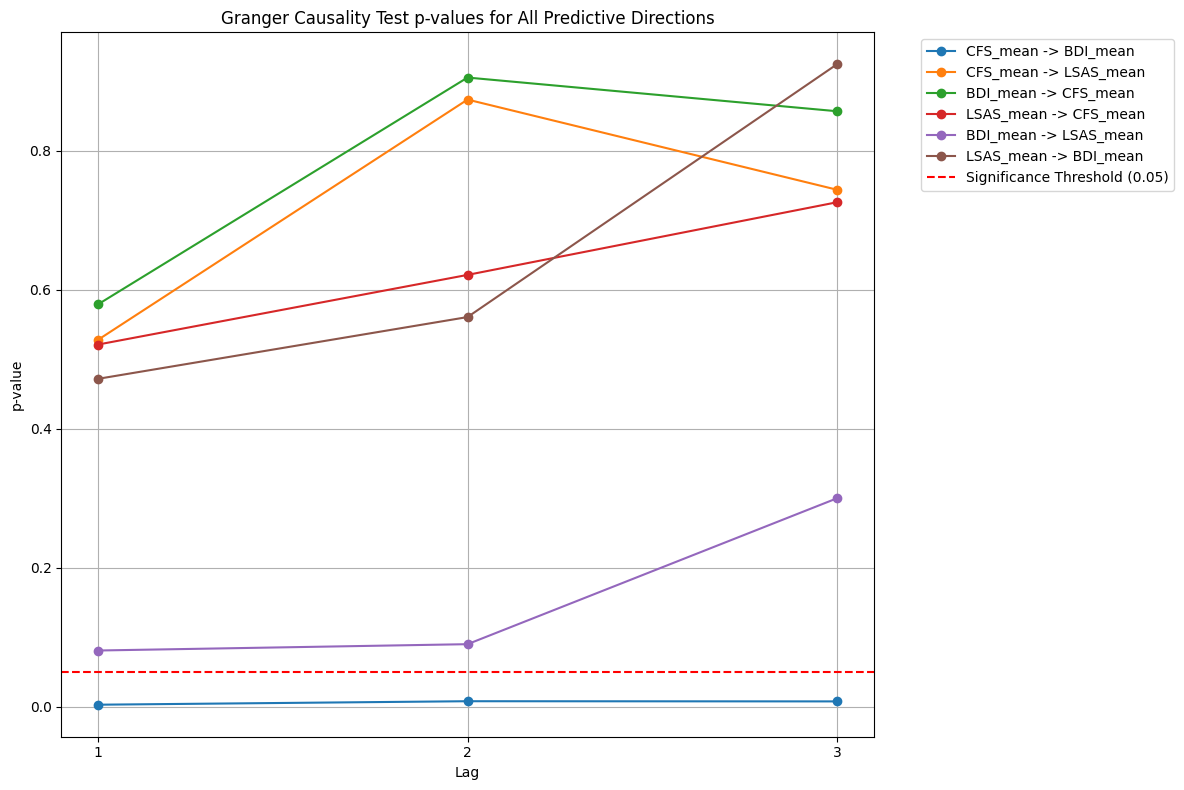

In [ ]:


# Compute the mean score across items for each group at each time point
df_mean_scores = pd.DataFrame({
    'CFS_mean': df_pivot[cfs_columns].mean(axis=1),
    'BDI_mean': df_pivot[bdi_columns].mean(axis=1),
    'LSAS_mean': df_pivot[lsas_columns].mean(axis=1)
}).dropna()  # Drop rows with NaN values

# Run Granger causality tests for all predictive directions
granger_tests = {
    'CFS_mean -> BDI_mean': ['CFS_mean', 'BDI_mean'],
    'CFS_mean -> LSAS_mean': ['CFS_mean', 'LSAS_mean'],
    'BDI_mean -> CFS_mean': ['BDI_mean', 'CFS_mean'],
    'LSAS_mean -> CFS_mean': ['LSAS_mean', 'CFS_mean'],
    'BDI_mean -> LSAS_mean': ['BDI_mean', 'LSAS_mean'],
    'LSAS_mean -> BDI_mean': ['LSAS_mean', 'BDI_mean']
}

# Store p-values
p_values = {}

for label, variables in granger_tests.items():
    result = grangercausalitytests(df_mean_scores[variables], maxlag=3, verbose=False)
    p_values[label] = [result[lag][0]['ssr_ftest'][1] for lag in result]

# Visualize p-values over different lags
lags = range(1, 4)
plt.figure(figsize=(12, 8))

for label, values in p_values.items():
    plt.plot(lags, values, marker='o', label=label)

plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xticks(lags)
plt.xlabel('Lag')
plt.ylabel('p-value')
plt.title('Granger Causality Test p-values for All Predictive Directions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

p_values

## Per-Question

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecate

      Cause   Effect  Lag 1 p-value  Lag 2 p-value  Lag 3 p-value
180    CFS7     BDI1       0.000060       0.003708       0.029477
164    CFS6    BDI13       0.000072       0.000497       0.000763
160    CFS6     BDI1       0.000115       0.000918       0.002851
2      CFS1    BDI11       0.000141       0.001480       0.027029
175    CFS6     BDI5       0.000242       0.000334       0.000001
..      ...      ...            ...            ...            ...
512    CFS9  LSAS_17       0.962562       0.045084       0.143704
600   BDI12   LSAS_1       0.965356       0.025612       0.157301
390    CFS4  LSAS_15       0.970352       0.353988       0.045020
344  CFS2_R  LSAS_17       0.970725       0.252986       0.014041
911    BDI5   LSAS_9       0.970959       0.029534       0.145162

[237 rows x 5 columns]


c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

c:\Users\MadiL\Thesis CodeBase\thesisenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecate

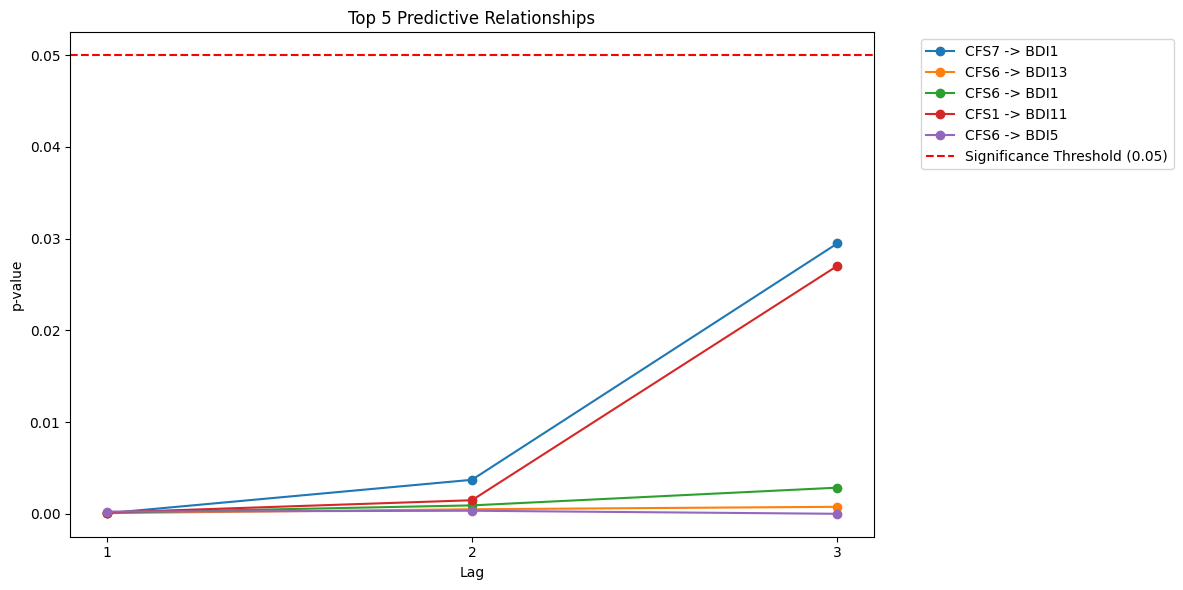

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests


# Run Granger causality tests at the item level
results = []

# Loop through all item pairs between CFS and BDI
for cfs_item in cfs_columns:
    for bdi_item in bdi_columns:
        try:
            test_result = grangercausalitytests(df_pivot[[cfs_item, bdi_item]].dropna(), maxlag=3, verbose=False)
            p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in test_result]
            results.append({'Cause': cfs_item, 'Effect': bdi_item, 'Lag 1 p-value': p_values[0], 'Lag 2 p-value': p_values[1], 'Lag 3 p-value': p_values[2]})
        except Exception as e:
            print(f"Error processing {cfs_item} -> {bdi_item}: {e}")

# Loop through all item pairs between CFS and LSAS
for cfs_item in cfs_columns:
    for lsas_item in lsas_columns:
        try:
            test_result = grangercausalitytests(df_pivot[[cfs_item, lsas_item]].dropna(), maxlag=3, verbose=False)
            p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in test_result]
            results.append({'Cause': cfs_item, 'Effect': lsas_item, 'Lag 1 p-value': p_values[0], 'Lag 2 p-value': p_values[1], 'Lag 3 p-value': p_values[2]})
        except Exception as e:
            print(f"Error processing {cfs_item} -> {lsas_item}: {e}")

# Loop through all item pairs between BDI and LSAS
for bdi_item in bdi_columns:
    for lsas_item in lsas_columns:
        try:
            test_result = grangercausalitytests(df_pivot[[bdi_item, lsas_item]].dropna(), maxlag=3, verbose=False)
            p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in test_result]
            results.append({'Cause': bdi_item, 'Effect': lsas_item, 'Lag 1 p-value': p_values[0], 'Lag 2 p-value': p_values[1], 'Lag 3 p-value': p_values[2]})
        except Exception as e:
            print(f"Error processing {bdi_item} -> {lsas_item}: {e}")

# Make a comprehensive table with p-values at all lags
df_results = pd.DataFrame(results)

# Filter for significant relationships (any lag p-value < 0.05)
df_significant = df_results[(df_results['Lag 1 p-value'] < 0.05) | 
                            (df_results['Lag 2 p-value'] < 0.05) | 
                            (df_results['Lag 3 p-value'] < 0.05)]

# Sort by Lag 1 p-value for significance
df_significant = df_significant.sort_values(by=['Lag 1 p-value'])

# Display the comprehensive table
print(df_significant[['Cause', 'Effect', 'Lag 1 p-value', 'Lag 2 p-value', 'Lag 3 p-value']])

# Visualization 1: Line plot for top 5 strongest relationships
top_5 = df_significant.nsmallest(5, 'Lag 1 p-value')

plt.figure(figsize=(12, 6))
for _, row in top_5.iterrows():
    plt.plot([1, 2, 3], [row['Lag 1 p-value'], row['Lag 2 p-value'], row['Lag 3 p-value']], marker='o', label=f"{row['Cause']} -> {row['Effect']}")

plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('Lag')
plt.ylabel('p-value')
plt.title('Top 5 Predictive Relationships')
plt.xticks([1, 2, 3])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

df_significant.to_csv('granger_results.csv', index=False)



In [22]:
import plotly.graph_objects as go

# Prepare data for Sankey diagram
sources = []
targets = []
values = []

# Add data for significant relationships
for _, row in df_significant.iterrows():
    sources.append(row['Cause'])
    targets.append(row['Effect'])
    values.append(min(row['Lag 1 p-value'], row['Lag 2 p-value'], row['Lag 3 p-value']))

# Create a list of unique labels
labels = list(set(sources + targets))

# Map labels to indices
label_indices = {label: i for i, label in enumerate(labels)}

# Convert sources and targets to indices
sources = [label_indices[source] for source in sources]
targets = [label_indices[target] for target in targets]

# Color code each node
# BDI is light blue, CFS is orange, LSAS is light green
node_colors = []
for label in labels:
    if 'BDI' in label:
        node_colors.append('lightblue')
    elif 'CFS' in label:
        node_colors.append('orange')
    elif 'LSAS' in label:
        node_colors.append('lightgreen')
    else:
        node_colors.append('white')

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

# Make bigger
fig.update_layout(height=800, width=1200)

fig.update_layout(title_text="Granger Causality Sankey Diagram", font_size=10)
fig.show()


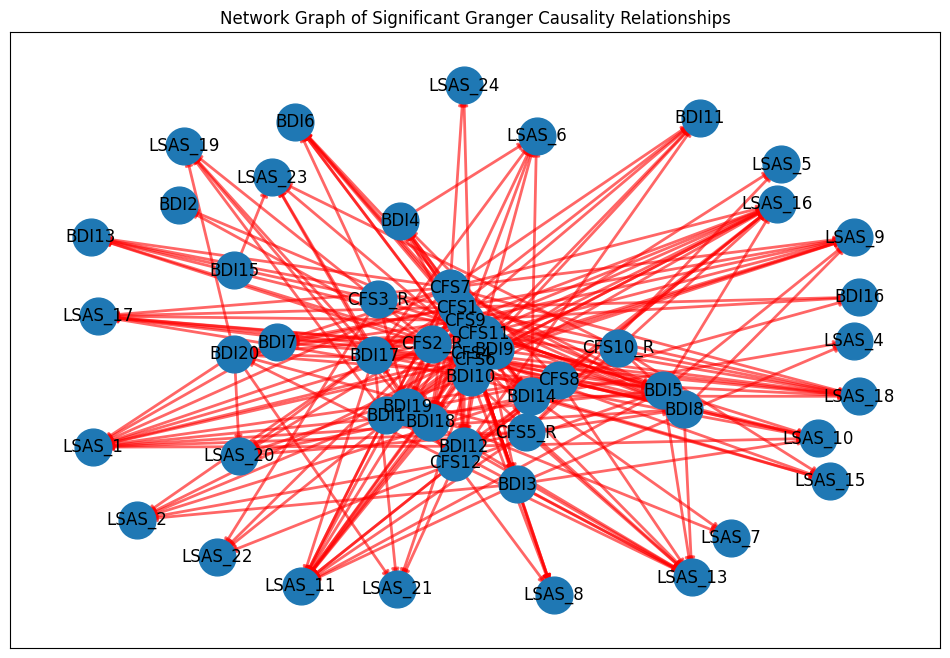

In [19]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each unique label
G.add_nodes_from(labels)

# Add edges for significant relationships
for _, row in df_significant.iterrows():
    G.add_edge(row['Cause'], row['Effect'], weight=min(row['Lag 1 p-value'], row['Lag 2 p-value'], row['Lag 3 p-value']))

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2, alpha=0.6, edge_color='r', arrows=True)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title('Network Graph of Significant Granger Causality Relationships')
plt.show()

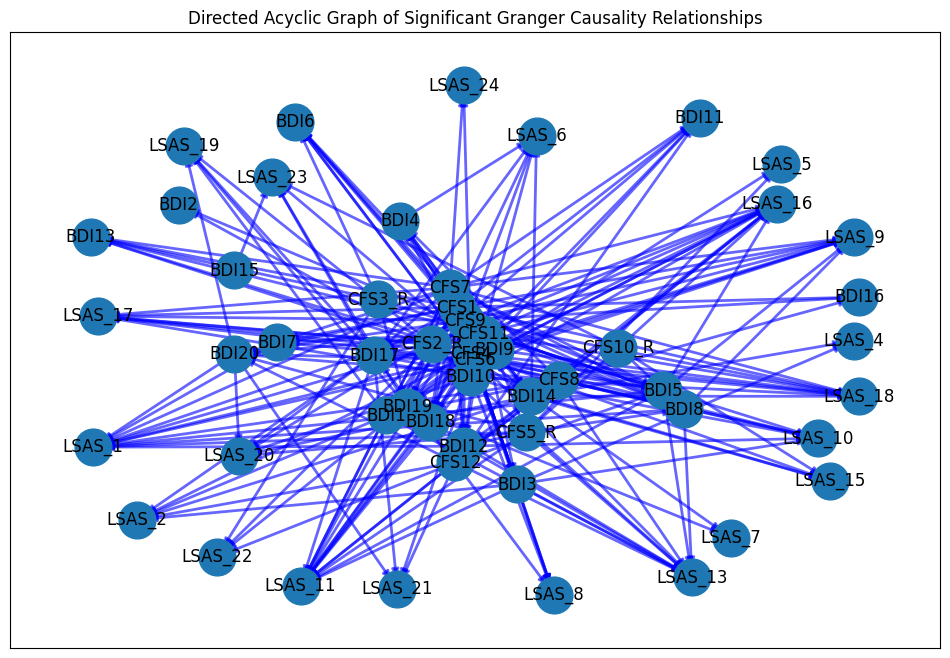

In [20]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a directed graph
DAG = nx.DiGraph()

# Add nodes for each unique label
DAG.add_nodes_from(labels)

# Add edges for significant relationships
for _, row in df_significant.iterrows():
    DAG.add_edge(row['Cause'], row['Effect'], weight=min(row['Lag 1 p-value'], row['Lag 2 p-value'], row['Lag 3 p-value']))

# Establish color coding
bdi_columns = [col for col in labels if 'BDI' in col]
cfs_columns = [col for col in labels if 'CFS' in col]
lsas_columns = [col for col in labels if 'LSAS' in col]
# Color code each node
# BDI is light blue, CFS is orange, LSAS is light green
node_colors = []
for node in DAG.nodes:
    if node in bdi_columns:
        node_colors.append('lightblue')
    elif node in cfs_columns: 
        node_colors.append('orange')
    elif node in lsas_columns:
        node_colors.append('lightgreen')
    else:
        node_colors.append('white')

# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(DAG, seed=42)  # positions for all nodes
nx.draw_networkx_nodes(DAG, pos, node_size=700)
nx.draw_networkx_edges(DAG, pos, edgelist=DAG.edges(data=True), width=2, alpha=0.6, edge_color='b', arrows=True)
nx.draw_networkx_labels(DAG, pos, font_size=12, font_family='sans-serif')

plt.title('Directed Acyclic Graph of Significant Granger Causality Relationships')
plt.show()